<a href="https://colab.research.google.com/github/irfanmd38/Healthcare-Database-Management-System-/blob/main/Python_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#House Price Prediction python project

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing


In [ ]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

In [ ]:
print(" Dataset Loaded Successfully")
print(df.head())
print("\nShape of Dataset:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

✅ Dataset Loaded Successfully
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Shape of Dataset: (20640, 9)

Missing Values:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [ ]:
display(df.describe())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
#heatmap

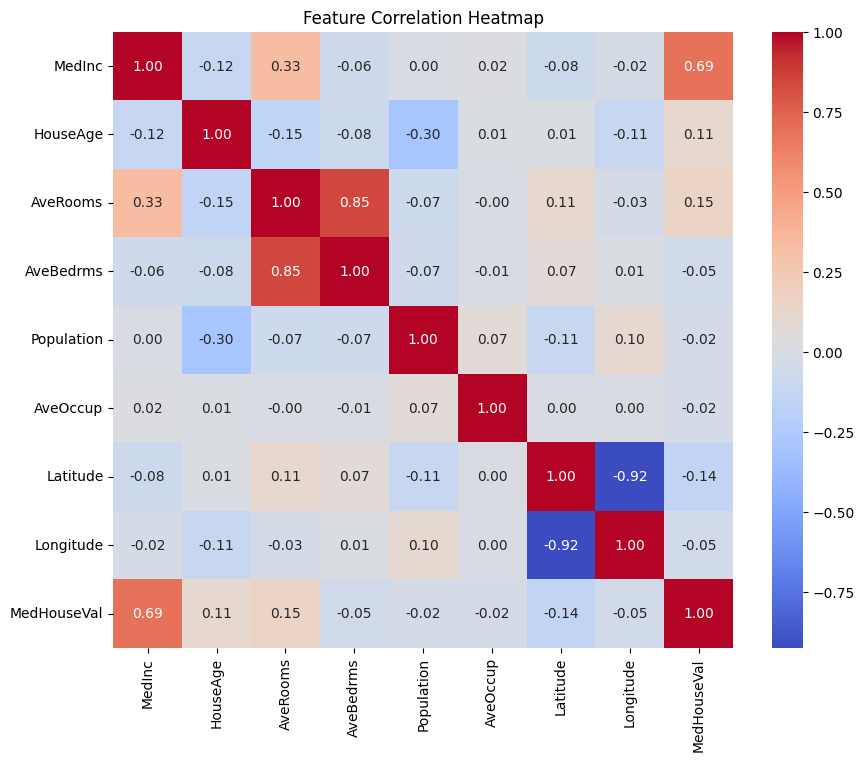

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
X = df.drop(columns=['MedHouseVal'])
Y = df['MedHouseVal']

In [ ]:
#Train and split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 16512, Testing samples: 4128


In [ ]:
#Model Training

In [ ]:
model = XGBRegressor(
    n_estimators=250,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
model.fit(X_train, Y_train)
print(" Model Training Completed")

In [ ]:
test_pred = model.predict(X_test)

r2_test = r2_score(Y_test, test_pred)
mae_test = mean_absolute_error(Y_test, test_pred)

print(f"\nTest R² Score: {r2_test:.3f}")
print(f"Test MAE: {mae_test:.3f}")


Test R² Score: 0.839
Test MAE: 0.299


In [ ]:
#Visualization - Actual vs Predicted Prices

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


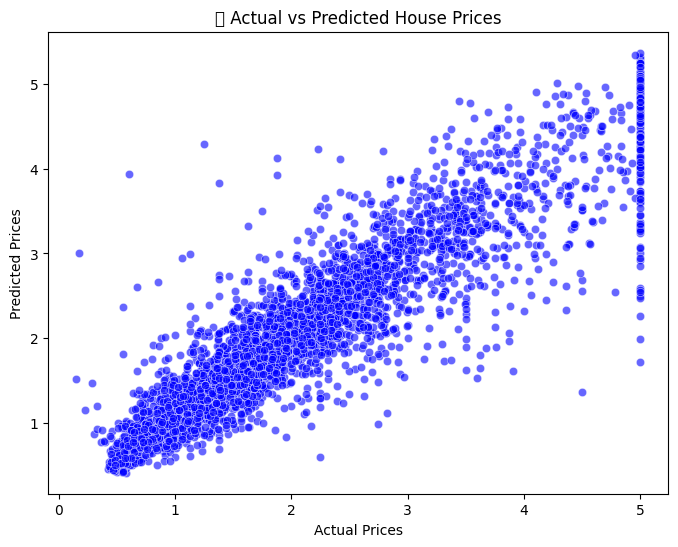

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=Y_test, y=test_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(" Actual vs Predicted House Prices")
plt.show()

/tmp/ipython-input-252447855.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


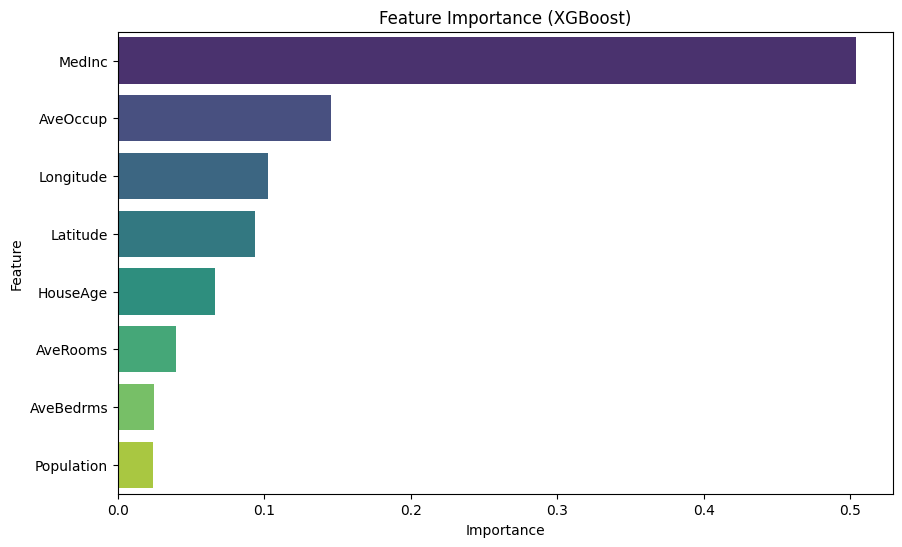

In [ ]:
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance (XGBoost)")
plt.show()

In [ ]:
!pip install streamlit




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 110.3 MB/s eta 0:00:00


In [ ]:
import streamlit as st



2025-11-13 06:32:51.207 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 06:32:51.544 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-11-13 06:32:51.545 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 06:32:51.547 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 06:32:51.549 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 06:32:51.549 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 06:32:51.550 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 06:32:51.823 Thread 'MainThread': mi

DeltaGenerator()

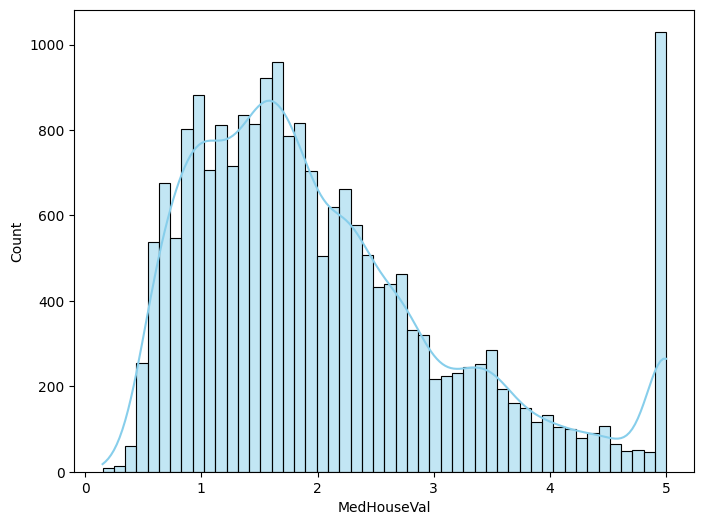

In [ ]:
# app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Load data
housing = fetch_california_housing(as_frame=True)
df = housing.frame

st.title("California Housing Dataset")

# Distribution plot
st.subheader("Distribution of Median House Value")
plt.figure(figsize=(8,6))
sns.histplot(df['MedHouseVal'], bins=50, kde=True, color='skyblue')
st.pyplot(plt)


In [ ]:
#Streamlit



Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing

# Load dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

st.title("California Housing Prices Prediction")

# Sidebar navigation
option = st.sidebar.selectbox("Choose Action", ["Dataset Overview", "Visualizations", "Predict House Price"])

if option == "Dataset Overview":
    st.subheader("Dataset Overview")
    st.write(df.head())
    st.write("Shape:", df.shape)
    st.write(df.describe())

elif option == "Visualizations":
    st.subheader("Distribution of Median House Value")
    plt.figure(figsize=(8,6))
    sns.histplot(df['MedHouseVal'], bins=50, kde=True, color='skyblue')
    st.pyplot(plt)

elif option == "Predict House Price":
    st.subheader("Predict Median House Value")

    # Input features
    MedInc = st.number_input("Median Income", value=3.0)
    HouseAge = st.number_input("House Age", value=20)
    AveRooms = st.number_input("Average Rooms", value=5.0)
    AveBedrms = st.number_input("Average Bedrooms", value=1.0)
    Population = st.number_input("Population", value=1000)
    AveOccup = st.number_input("Average Occupancy", value=3.0)
    Latitude = st.number_input("Latitude", value=34.0)
    Longitude = st.number_input("Longitude", value=-118.0)

    X = df.drop(columns=['MedHouseVal'])
    Y = df['MedHouseVal']
    model = XGBRegressor(n_estimators=250, learning_rate=0.1, max_depth=6, random_state=42)
    model.fit(X, Y)

    if st.button("Predict"):
        input_df = pd.DataFrame([[MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]], columns=X.columns)
        prediction = model.predict(input_df)[0]
        st.success(f"Predicted Median House Value: ${prediction*100000:.2f}")




Writing app.py


In [ ]:

!ngrok authtoken 35M5Dg3H3GP1brkB5vVabJuRgOk_3smfjoj6Q57fPq6fsUDHv

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!streamlit run app.py &
from pyngrok import ngrok
public_url = ngrok.connect(port=8501)
public_url





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.190.156.22:8501



In [ ]:
streamlit run app.py
